In [1]:
import pandas as pd
import numpy as np
import scipy as sc

In [2]:
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
import quandl

In [4]:
import warnings 
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Перечень данных

1. Скорректированный на инфляцию ВВП  
    Real Gross Domestic Product `GDPC1`  
      
    Реальный ВВП представляет собой меру, которая отражает стоимость всех товаров и услуг, произведенных экономикой в данном году с поправкой на инфляцию, выраженную в ценах базового года.
      
      
2. Индекс потребительских цен  
    Consumer Price Index for All Urban Consumers: All Items `CPIAUCSL`       
      
   Индекс потребительских цен измеряет изменения в уровне цен средневзвешенной рыночной корзины потребительских товаров и услуг, купленных домашними хозяйствами.
      
      
3. Денежная база 1    
    M1 Money Stock `M1`  
   
   M1 состоит из: (1) валюты за пределами Казначейства США, Федеральных резервных банков и хранилищ депозитарных учреждений; (2) дорожных чеков небанковских эмитентов; (3) депозитов до востребования; и (4) другие чековые депозиты (OCDs), которые состоят в основном из проектных счетов кредитных союзов.
     
     
4. Денежная база 2   
    M2 Money Stock `M2`    
    
    M2 состоит из M1 плюс: (1) сберегательные депозиты (которые включают депозитные счета денежного рынка или MMDA); (2) срочные депозиты малого номинала (срочные депозиты на сумму менее 100 000 долл. США); и (3) остатки в розничных паевых инвестиционных фондах (MMMF). Скорректированная на сезонность M2 рассчитывается путем суммирования сберегательных депозитов, срочных депозитов малого номинала и розничных MMMF, каждая из которых скорректирована с учетом сезонных колебаний, и суммирует этот результат с сезонной корректировкой M1.
      
      
5. 30-Year Treasury Constant Maturity Rate `DGS30`, `DGS10`, `DGS5`
  
  
6. Доля безработных людей  
    Civilian Unemployment Rate `UNRATE`
  
   Количсетво безработных в процентах от общей рабочей силы
  
  
7. Реальный доход домохозяств  
    Real Median Household Income in the United States `MEHOINUSA672N`  
    
    Медианный заработок домохозяйств США
    
8. Уровень сбережений   
    Personal Saving Rate `PSAVERT`
    
    Личные сбережения населения в процентах от располагаемого личного дохода

9. Федеральный долг США
    Federal Debt: Total Public Debt `GFDEBTN`
    
    Государственный долг США
      
10. Industrial Production Index `INDPRO`

    Индекс промышленного производства (IPI) - это экономический показатель, который измеряет реальный объем производства в обрабатывающей промышленности, добыче полезных ископаемых и коммунальных услугах.
    

In [5]:
quandl.ApiConfig.api_key = 'W_YrzDjEuJfBVFmaRa-H'

GDP = quandl.get('FRED/GDPC1',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
CPI = quandl.get('FRED/CPIAUCSL',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
M2 = quandl.get('FRED/M2',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
DGS30 = quandl.get('FRED/DGS30',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
DGS10 = quandl.get('FRED/DGS10',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
DGS3M = quandl.get('FRED/DGS3MO',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
UNRATE = quandl.get('FRED/UNRATE',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
HouseInc = quandl.get('FRED/MEHOINUSA672N',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
Saves = quandl.get('FRED/PSAVERT',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
DebtF = quandl.get('FRED/GFDEBTN',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")
PromIndex = quandl.get('FRED/INDPRO',  start_date="1998-12-31", end_date="2018-12-31", collapse="monthly")

TS = pd.merge(CPI, GDP, how = 'left', on = 'Date', suffixes= ('1', '2') )

list = [ M2, DGS30, DGS10, DGS3M, UNRATE, HouseInc, Saves, DebtF, PromIndex]

for element in list:
    TS = pd.merge(TS, element, how = 'left', on = 'Date', suffixes= ('1', '2'))

list = ['CPI', 'GDP', 'M2', 'DGS30', 'DGS10', 'DGS3M', 'UNRATE', 'HouseInc', 'Saves', 'DebtF', 'PromIndex']
TS.columns = list
TS = TS.interpolate(method = 'spline', order = 3)
TS = TS.reset_index()
TS['dif_DSG330'] = TS['DGS30'] - TS['DGS3M']
TS = TS.drop(columns = ['DGS30', 'DGS3M', 'DGS10'])
TS = TS[['Date', 'GDP','CPI',  'M2', 'DebtF', 'PromIndex', 'Saves' , 'HouseInc','dif_DSG330' , 'UNRATE'  ]]

TS_stat = TS.describe().T
TS_stat.reset_index()
TS_stat.to_excel('macro_stat.xlsx')
TS.to_excel('macro_data.xlsx')

In [6]:
TS = pd.read_excel('macro_data.xlsx')

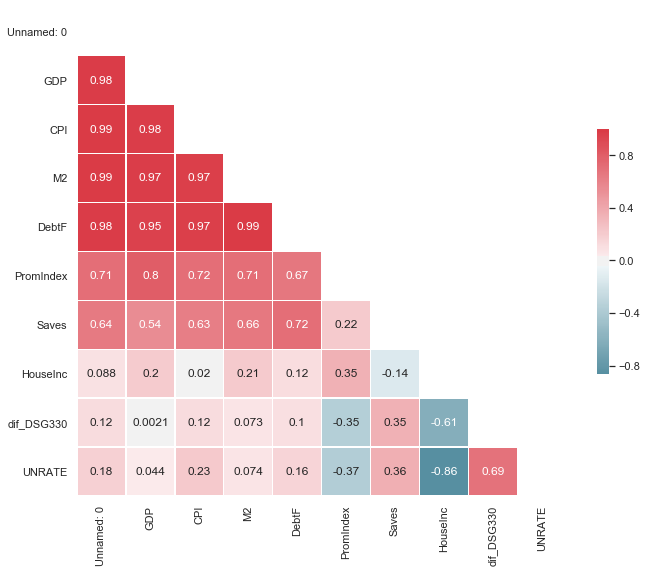

In [7]:
%config InlineBackend.figure_format = 'png' 
sns.set(style="white")

# Compute the correlation matrix
corr = TS.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [8]:
TS = TS.drop(columns = ['GDP', 'M2', 'DebtF', 'PromIndex', 'HouseInc'])

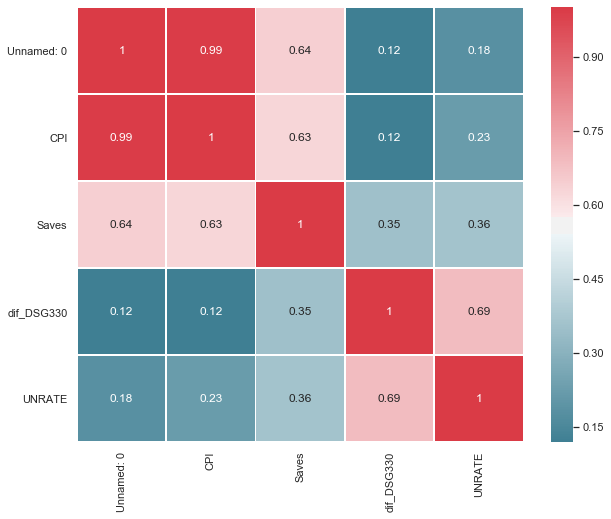

In [9]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize= (10,8))
ax = sns.heatmap(TS.corr(),\
                 annot=True, linewidths=.5,  cmap=cmap)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [10]:
TS = pd.read_excel('macro_data.xlsx')
TS = TS.drop(columns = ['GDP', 'M2', 'DebtF', 'PromIndex', 'HouseInc'])
TS = TS.drop(columns = ['Unnamed: 0'])
TS = TS.set_index(keys = 'Date')
TS['dCPI'] = TS['CPI'].pct_change()
TS['dSaves'] = TS['Saves'].pct_change()
TS['ddif_DSG330'] = TS['dif_DSG330'].pct_change()
TS['dUNRATE'] = TS['UNRATE'].pct_change()
TS.dropna(inplace = True)

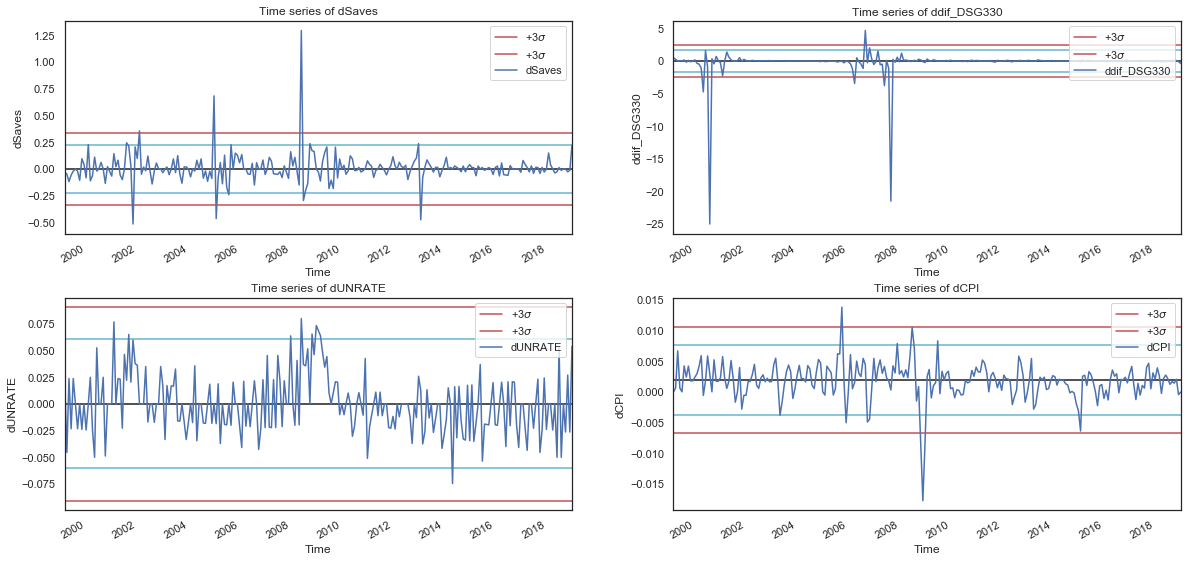

In [11]:
median_S = TS.dSaves.median()
MAD_S = TS.dSaves.mad()
sig_robust_S = MAD_S * 1.4826

median_DS = TS.ddif_DSG330.median()
MAD_DS = TS.ddif_DSG330.mad()
sig_robust_DS = MAD_DS * 1.4826

median_CPI = TS.dCPI.median()
MAD_CPI = TS.dCPI.mad()
sig_robust_CPI = MAD_CPI * 1.4826

median_UNR = TS.dUNRATE.median()
MAD_UNR = TS.dUNRATE.mad()
sig_robust_UNR = MAD_UNR * 1.4826


fig = plt.figure(figsize=(20,10))
ax11 = fig.add_subplot(221); ax12 = fig.add_subplot(222); ax21 = fig.add_subplot(223);
ax22 = fig.add_subplot(224)

#ax11
ax11.plot(TS.index, len(TS.dSaves)*[median_S], color="k" )
ax11.plot(TS.index, len(TS.dSaves)*[median_S+2*sig_robust_S], color='c' )
ax11.plot(TS.index, len(TS.dSaves)*[median_S-2*sig_robust_S], color='c' )
ax11.plot(TS.index, len(TS.dSaves)*[median_S+3*sig_robust_S], color='r', label="+3$\sigma$" )
ax11.plot(TS.index, len(TS.dSaves)*[median_S-3*sig_robust_S], color='r', label="+3$\sigma$" )
TS.dSaves.plot(ax=ax11)
ax11.set_title("Time series of dSaves"); ax11.set_xlabel("Time"); ax11.set_ylabel('dSaves')
ax11.legend(loc="upper right")

#ax12
ax12.plot(TS.index, len(TS.ddif_DSG330)*[median_DS], color="k" )
ax12.plot(TS.index, len(TS.ddif_DSG330)*[median_DS+2*sig_robust_DS], color='c' )
ax12.plot(TS.index, len(TS.ddif_DSG330)*[median_DS-2*sig_robust_DS], color='c' )
ax12.plot(TS.index, len(TS.ddif_DSG330)*[median_DS+3*sig_robust_DS], color='r', label="+3$\sigma$" )
ax12.plot(TS.index, len(TS.ddif_DSG330)*[median_DS-3*sig_robust_DS], color='r', label="+3$\sigma$" )
TS.ddif_DSG330.plot(ax=ax12)
ax12.set_title("Time series of ddif_DSG330"); ax12.set_xlabel("Time"); ax12.set_ylabel('ddif_DSG330')
ax12.legend(loc="upper right")

#ax21
ax21.plot(TS.index, len(TS.dUNRATE)*[median_UNR], color="k" )
ax21.plot(TS.index, len(TS.dUNRATE)*[median_UNR+2*sig_robust_UNR], color='c' )
ax21.plot(TS.index, len(TS.dUNRATE)*[median_UNR-2*sig_robust_UNR], color='c' )
ax21.plot(TS.index, len(TS.dUNRATE)*[median_UNR+3*sig_robust_UNR], color='r', label="+3$\sigma$" )
ax21.plot(TS.index, len(TS.dUNRATE)*[median_UNR-3*sig_robust_UNR], color='r', label="+3$\sigma$" )
TS.dUNRATE.plot(ax=ax21)
ax21.set_title("Time series of dUNRATE"); ax21.set_xlabel("Time"); ax21.set_ylabel('dUNRATE')
ax21.legend(loc="upper right")

#ax22
ax22.plot(TS.index, len(TS.dCPI)*[median_CPI], color="k" )
ax22.plot(TS.index, len(TS.dCPI)*[median_CPI+2*sig_robust_CPI], color='c' )
ax22.plot(TS.index, len(TS.dCPI)*[median_CPI-2*sig_robust_CPI], color='c' )
ax22.plot(TS.index, len(TS.dCPI)*[median_CPI+3*sig_robust_CPI], color='r', label="+3$\sigma$" )
ax22.plot(TS.index, len(TS.dCPI)*[median_CPI-3*sig_robust_CPI], color='r', label="+3$\sigma$" )
TS.dCPI.plot(ax=ax22)
ax22.set_title("Time series of dCPI"); ax22.set_xlabel("Time"); ax22.set_ylabel('dCPI'); ax22.legend(loc="upper right")
plt.subplots_adjust(hspace=0.3)

plt.show()

In [12]:
print(TS.shape)
ind = np.array([])
for element in TS.columns[4:]:
    Z = (np.abs(TS[element] - TS[element].median()) > (3 * 1.4826 * TS[element].mad())) 
    outliers = Z[Z == True].index
    outliers = [index for index in outliers if index not in ind]
    ind =  np.concatenate((outliers, ind), axis=None)
TS.drop(ind, inplace = True)
TS.shape

(239, 8)


(223, 8)

Text(0, 0.5, 'dif_DSG330')

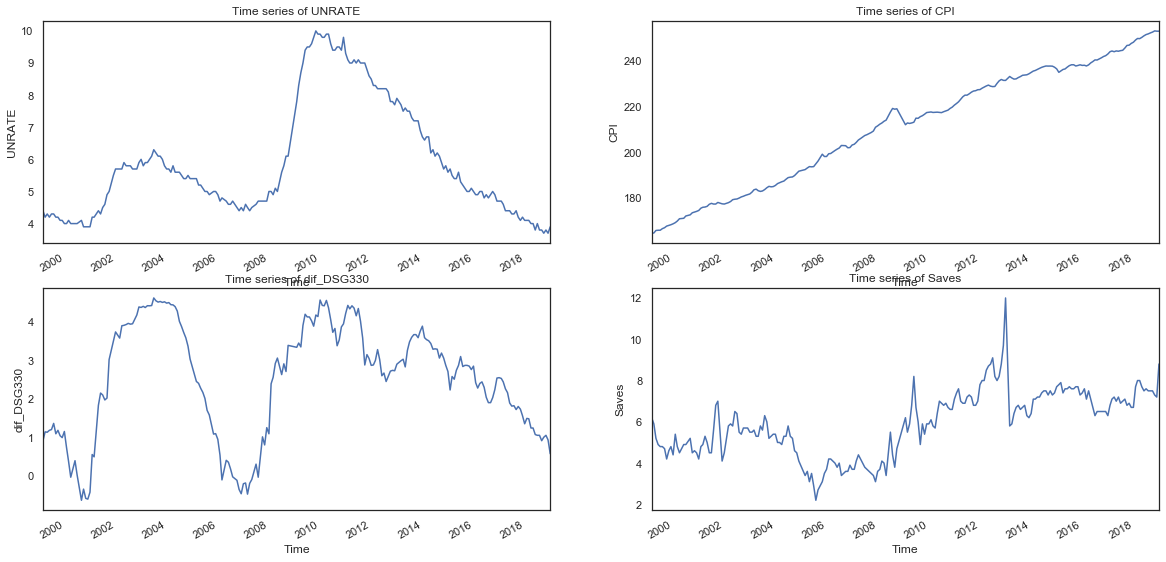

In [13]:
fig = plt.figure(figsize=(20,10))
ax11 = fig.add_subplot(221); ax12 = fig.add_subplot(222); ax21 = fig.add_subplot(223);
ax22 = fig.add_subplot(224)

TS.UNRATE.plot(ax=ax11)
ax11.set_title("Time series of UNRATE"); ax11.set_xlabel("Time"); ax11.set_ylabel("UNRATE")

TS.Saves.plot(ax=ax22)
ax22.set_title("Time series of Saves"); ax22.set_xlabel("Time"); ax22.set_ylabel("Saves")

TS.CPI.plot(ax=ax12)
ax12.set_title("Time series of CPI"); ax12.set_xlabel("Time"); ax12.set_ylabel("CPI")

TS.dif_DSG330.plot(ax=ax21)
ax21.set_title("Time series of dif_DSG330"); ax21.set_xlabel("Time"); ax21.set_ylabel("dif_DSG330")

In [14]:
TS.to_excel('macro_merge.xlsx')